## Jupyter Placeholder with learn-env

### Problem:

- Microsoft want to create a new movie studio but have no idea about creating movies
- respondible to ecplore what types of films are currently doing the best at the box office
- turn analysis to actionable insights
- the results from that will help Microsoft's new movie studio decide what type of films to create.

## Data understanding

### IMDB Database

* `movie_basics` : Table containing movies including original movie title, premiered movie title(primary title?), release year, length of the movie and the genre
* `persons` : Table containing the name of people in the theatre entertainment industry and their primary profession (actor, director etc.)
* `directors`: Table with movie ID and its correspongin director's ID
* `known_for`: Table containing the person's ID and the corresponding movie ID that the person is known for.
* `movie_akas`: Table containing movies and the title they are known as in different countries.
* `movie_ratings`: Table containing movie ID and their average rating and number of ratings they received on IMDB
* `principals`: Table containing movie ID and the corresponding person ID that is involved in the movie in some sort of capacity, specified in the category, jobs and character (if they are actors) columns.
* `writers` : Table containing movie ID and their corresponding writers' person ID

### bom.movie_gross.csv
* **Source** : This dataset comes from [Box office mojo](https://www.boxofficemojo.com/) - a website that tracks film revenue
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### rotten_tomatoes_movies.csv
* **Source** : This dataset comes from [Rotten Tomatoes](https://www.rottentomatoes.com/) - an "online aggregator of movie and TV show reviews from critics"
* **Contents** : Data about movies including their synopsis, rating, genre, director, writer, release data in theatre, release data on DVD, Box office rental profit, length of movie and studio of production.

### tmdb.movies.csv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tn.movie_budgets.csv
* **Contents** : Data about movies' production budget along with release date, domestic gross and worldwide gross


Below we import the `sqlite3`, `pandas` and `numpy`, which will be used to for reading and exploring our data. We are also importing `seaborn` and `matplotlib` modules, which we will use for visualization.

In [1]:
#Run this cell without changes
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Functions for our analysis

In [2]:
strings_to_remove = ['$',',']

def remove_chars(ds,char):
    """
    remove characters from the data series
    -
    ds: data series, lists. Element in data series or list must be a string.
    char: character to be removed. Accepts lists
    """
    for char in char:
        idx = 0
        for row in ds:
            if char in row:
                ds[idx] = row.replace(char,"")
            idx +=1
    return ds


In [3]:
def read_sql_as_df(table_name, con):
    """
    Selects all columns in a database table and convert it into a Dataframe
    -
    Input:
    table_name = takes in a string of the table name to import
    con = variable that has the established database connection   
    -
    Output:
    DataFrame containing all columns of the database table.
    """
    query = """SELECT * FROM ({table_name})""".format(table_name = table_name)
    return pd.read_sql(query,con)

### IMDB Data

In [4]:
conn = sqlite3.connect('./zippedData/im.db')

In [5]:
imdb_schema = pd.read_sql("""

SELECT * from sqlite_master

""",conn)
imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [6]:
movie_akas_df = read_sql_as_df('movie_akas',conn)
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [7]:
movie_ratings_df = read_sql_as_df('movie_ratings',conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
directors_df = read_sql_as_df('directors',conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [9]:
writers_df = read_sql_as_df('writers',conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [10]:
movie_basics_df = read_sql_as_df('movie_basics',conn)
movie_basics_df.tail()
# movie_basics.columns

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [11]:
persons_df = read_sql_as_df('persons',conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [12]:
known_for_df = read_sql_as_df("known_for",conn)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [13]:
principals_df = read_sql_as_df("principals",conn)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


### Non database data

#### Rotten Tomatoes

rt_movies_df = pd.read_csv('./zippedData/rotten_tomatoes_movies.csv')
rt_movies_df.head()

#### The number (budgets)

In [14]:
movie_budget_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget_df.head()
# movie_budget_df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Box office mojo (gross profit)

In [15]:
movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()
# movie_gross_df.info()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### TMDB movies

In [16]:
tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
remove_chars(tmdb_movies_df['genre_ids'],["[","]"]) #genre_ids now is a string. Function turns it into a list.

tmdb_movies_df.head()
# tmdb_movies_df.info()

<ipython-input-2-12e64535c132>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[idx] = row.replace(char,"")


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"12, 14, 10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"14, 12, 16, 10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"12, 28, 878",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"16, 35, 10751",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"28, 878, 12",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [17]:
#Rreplace field that's entirely space (or empty) with '101', which is the genre key for genre "Unknown"
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].str.replace(r'^\s*$','101')

In [18]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## Why Reboots?

We want to show from the data-
- List of the top 50 grossing movies of the 80s and 90s
- How many of these top 50 movies of the 80s and 90s have a remake?
- Compare the average grossing of the remakes of these movies with the average grossing of the non-remake movies.

#### Cleaning the 'The Numbers' movie budget data

In [19]:
#convert the release date column to datetime format and extract the year to put in a separate column
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])
movie_budget_df['Year'] = movie_budget_df['release_date'].dt.year
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [20]:
#using the funtion defined above, remove '$ and ,' from production budget, domestic gross and worldwide gross
#strings_to_remove = ['$',',']

#remove_chars(movie_budget_df['production_budget'],strings_to_remove)
#remove_chars(movie_budget_df['domestic_gross'],strings_to_remove)
#remove_chars(movie_budget_df['worldwide_gross'],strings_to_remove)

movie_budget_df['production_budget'] = movie_budget_df['production_budget'].str.replace('$','')
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].str.replace(',','')
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].str.replace('$','')
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].str.replace(',','')
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].str.replace('$','')
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].str.replace(',','')

movie_budget_df['production_budget'] = movie_budget_df['production_budget'].astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].astype(float)

movie_budget_df['production_budget'] = movie_budget_df['production_budget'] / 1000000
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'] / 1000000
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'] / 1000000

movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,2011
2,3,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,2017


In [21]:
#subset a df which includes only entries for movies between 1980 and 2000
decades_df = movie_budget_df[(movie_budget_df['Year'] >= 1980) & (movie_budget_df['Year'] <=2000)]
decades_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,1997
106,7,1999-06-30,Wild Wild West,175.0,113.805681,221.229335,1999
109,10,1995-07-28,Waterworld,175.0,88.246220,264.246220,1995
199,100,1999-06-16,Tarzan,145.0,171.091819,448.191819,1999
207,8,1998-07-01,Armageddon,140.0,201.578182,554.600000,1998


In [22]:
#get the top 50 grossing movies of 80s and 90s. Also, assign the names to a list
decades_top50_df = decades_df.sort_values(by='worldwide_gross',ascending=False).head(50)
decades_top50_list= list(decades_top50_df['movie'])
decades_top50_df #List of the top 50 grossing movies of the 80s and 90s

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,1997
824,25,1993-06-11,Jurassic Park,63.0,395.708305,1038.812584,1993
303,4,1999-05-19,Star Wars Ep. I: The Phantom Menace,115.0,474.544677,1027.044677,1999
608,9,1994-06-15,The Lion King,79.3,421.785283,986.214868,1994
626,27,1996-07-02,Independence Day,75.0,306.169255,817.400878,1996
3525,26,1982-06-11,ET: The Extra-Terrestrial,10.5,435.110554,792.965326,1982
981,82,1994-07-06,Forrest Gump,55.0,330.151138,679.850637,1994
1374,75,1999-08-06,The Sixth Sense,40.0,293.506292,672.806292,1999
630,31,1997-05-22,The Lost World: Jurassic Park,75.0,229.086679,618.638999,1997
2485,86,1991-11-13,Beauty and the Beast,20.0,376.057266,608.431132,1991


In [23]:
#Add a column in the original database called 'Reboot' for which we have a True value 
#if it is a remake of the top grossing 80s or 90s movie

check_reboot_df = movie_budget_df
check_reboot_df['Reboot'] = False

index=[]
for decade_movie in decades_top50_list:
        if len(check_reboot_df.loc[check_reboot_df['movie'].str.contains(decade_movie, case = False, regex=True)])>1:
            index=list(check_reboot_df.loc[check_reboot_df['movie'].str.contains(decade_movie, case = False, regex=True)].index)
            for indice in index:
                check_reboot_df['Reboot'][indice] =True

check_reboot_df['Reboot'].value_counts() #76 remakes

<ipython-input-23-6785e671cf93>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_reboot_df['Reboot'][indice] =True


False    5706
True       76
Name: Reboot, dtype: int64

In [24]:
#We see the data needs some hard-coding for remake movies whos titles are not identical as the original movies
franchise=["Terminator 2: Judgment Day","Star Wars Ep. V: The Empire Strikes Back",
           "Star Wars Ep. VI: Return of the Jedi","Star Wars Ep. I: The Phantom Menace", "Jurassic", 
           "Indiana Jones and the Last Crusade", "Raiders of the Lost Ark"]
for movie in franchise:
    index=check_reboot_df.loc[check_reboot_df['movie'] == movie].index
    check_reboot_df['Reboot'][index] = True
    
check_reboot_df['Reboot'].value_counts() #82 remakes

<ipython-input-24-d1b312b1fd98>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_reboot_df['Reboot'][index] = True
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


False    5700
True       82
Name: Reboot, dtype: int64

In [25]:
#Merge check_reboot_df with decades_top50_df to see how many out of top grossing 80s and 90s movies have remakes
decades_merge_df=decades_top50_df.merge(check_reboot_df, how = 'left', on = 'movie')
decades_merge_df_cleaned = decades_merge_df.drop(['release_date_x', 'id_y', 'release_date_y', 
                                                  'production_budget_y', 'domestic_gross_y', 'worldwide_gross_y', 
                                                  'Year_y'], axis = 1)

decades_merge_df_cleaned['Reboot'].value_counts() #32 out of 50 top grossing movies from 80s and 90s have remakes! 
#~60% of the movies

True     32
False    22
Name: Reboot, dtype: int64

In [43]:
#hardcoding some missing values
movie_budget_df['worldwide_gross'][3822] = 5.127434
movie_budget_df['worldwide_gross'][4628] = 1081.041287
movie_budget_df['worldwide_gross'][5031] = 1.800000

<ipython-input-43-9aef0371b24e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budget_df['worldwide_gross'][3822] = 5.127434
<ipython-input-43-9aef0371b24e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budget_df['worldwide_gross'][4628] = 1081.041287
<ipython-input-43-9aef0371b24e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_budget_df['worldwide_gross'][5031] = 1.800000


In [112]:
#subset df for movies which have a reboot and were were released after 2000
rebooted_2000_df= movie_budget_df[(movie_budget_df['Reboot']==True) & (movie_budget_df['Year']>2000)]
rebooted_2000_df = rebooted_2000_df.groupby(by='Year').mean()

In [113]:
#subset df for movies which don't have a reboot and were released after 2000
non_rebooted_2000_df= movie_budget_df[(movie_budget_df['Reboot']==False) & (movie_budget_df['Year']>2000)]
non_rebooted_2000_df=non_rebooted_2000_df.sample(100, random_state=11)
non_rebooted_2000_df = non_rebooted_2000_df.groupby(by='Year').mean()

<Figure size 1080x360 with 0 Axes>

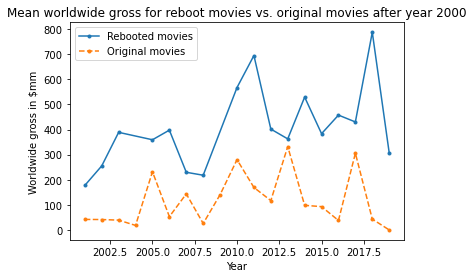

In [115]:
#comparing the mean worldwide gross for remade movies vs original movies after the year 2000
plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
ax.plot(rebooted_2000_df.index, rebooted_2000_df['worldwide_gross'], linestyle="-", label='Rebooted movies', marker='.')
ax.plot(non_rebooted_2000_df.index, non_rebooted_2000_df['worldwide_gross'], linestyle="--", label='Original movies', marker='.')
#ax.plot(scaley=False)
ax.set_title("Mean worldwide gross for reboot movies vs. original movies after year 2000")
ax.set_xlabel("Year")
ax.set_ylabel("Worldwide gross in $mm")
ax.legend()

plt.show()

### Clean TMDB table

In [ ]:
tmdb_genre= {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western',
 101: 'Unknown'}

In [ ]:
genre_names_lists=[]
idx = 0
for genre_list in tmdb_movies_df['genre_ids']:
    genre_list = genre_list.split(', ')
    genre_names=[]
    genre_names = [tmdb_genre[int(genre_id)] for genre_id in genre_list]
    genre_names_lists.append(genre_names)
tmdb_movies_df['genre_names'] = genre_names_lists

In [ ]:
tmdb_movies_df.head()

## Genre Popularity 

## Top 20 Studios

#### Rotten Tomatoes

In [ ]:
rt_movies_df_cleaned = rt_movies_df.dropna(subset = ['production_company','audience_rating'])
rt_movies_df_cleaned = rt_movies_df_cleaned.reset_index(drop = True)

In [ ]:
rt_movies_df_cleaned.info()

In [ ]:
studio_dict={"Sony": "Sony Pictures Entertainment", "Warner":"Warner Brothers","Fox":"21st Century Fox"
             , "Paramount":"Paramount Pictures",'MGM':'MGM', 'HBO':"HBO","Lion":"Lions Gate","Miramax":"Miramax",
             "Disney": "Walt Disney","WARNER":"Warner Brothers", "Buena":"Buena Vista","MCA":"Universal Pictures"}

In [ ]:
len(rt_movies_df_cleaned['production_company'].unique())

In [ ]:
rt_movies_df_cleaned.shape

In [ ]:
idx = 0
for company in rt_movies_df_cleaned['production_company']:
    for key,value in studio_dict.items():
        if key in company:
#             print (company, value)
#             print ("Before: ", rt_movies_df_cleaned['production_company'][idx])
            rt_movies_df_cleaned['production_company'][idx] = value
#             print("After: ", rt_movies_df_cleaned['production_company'][idx])
    idx +=1     

In [ ]:
len(rt_movies_df_cleaned['production_company'].unique())

In [ ]:
rt_movies_df_cleaned.shape

In [ ]:
top_20_studios = list(rt_movies_df_cleaned['production_company'].value_counts().index)[0:20]
top_20_studios_counts = rt_movies_df_cleaned['production_company'].value_counts()[0:20]
top_20_studios_counts

In [ ]:
#Filter dataframe to just movies produced by the top 50 studios
rt_movies_top_20_studios = rt_movies_df_cleaned[rt_movies_df_cleaned['production_company'].isin(top_20_studios)]
rt_movies_top_20_studios.tail(2)

In [ ]:
average_rating_by_studio = rt_movies_top_20_studios.groupby('production_company').mean()['audience_rating']
average_rating_by_studio = average_rating_by_studio.reindex(index=top_20_studios_counts.index)
# average_rating_by_studio = average_rating_by_studio.sort_values(ascending = False)
average_rating_by_studio

#### BOM data

In [ ]:
import numpy as np

#cleaning up foreign gross film
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].map(lambda x: 0 if x is np.nan else x)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(",",'')
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(0)

In [ ]:
#cleaning up domestic gross
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(0)


In [ ]:
movie_gross_df.info()

In [ ]:
movie_gross_df['total_gross'] = movie_gross_df['foreign_gross'] + movie_gross_df['domestic_gross']

In [ ]:
movie_gross_df.sample(10)

In [ ]:
studio_counts = movie_gross_df['studio'].value_counts()[0:20]

In [ ]:
#How many movies each studio make

fig, ax = plt.subplots()

ax.barh(list(studio_counts.index), list(studio_counts.values))

plt.show()

In [ ]:
#Create empty dictionary that we will populate with studios as keys and average total worldwide gross
#of all movies in the genre as values
studio_avg_gross ={} 

#Calculating average worldwide gross:
for studio in list(studio_counts.index): #loop through studios in the studio list 
    n = 0 #number of movies 
    gross_sum = 0 #rating summation
    idx =0  #keep track of row index
    for row in movie_gross_df['studio']: #go down row by row in studio column
        if (row==studio): #if genre in genre list is in genre in the row
#             print(test['averagerating'][0])
            gross_sum += movie_gross_df['total_gross'][idx] #grab the total gross and add it to the total sum
            n+=1 #add one to count of movie with that studio production
        idx +=1 #keep track of row index
    studio_avg_gross[studio] = gross_sum/n #calculate average rating of the genre
    
studio_avg_gross_values_sorted =dict(sorted(studio_avg_gross.items(),key=lambda item: item[1]))
studio_avg_gross_keys_sorted = dict(sorted(studio_avg_gross.items(),key=lambda item: item[0]))

In [ ]:
fig, ax = plt.subplots()

sns.barplot(y=list(studio_avg_gross_values_sorted.keys()), x=list(studio_avg_gross_values_sorted.values()))

plt.show()

In [ ]:
studio_avg_gross_top20 = {'IFC Films': 3080677.698795181,
 'Universal Pictures': 202429688.37687075,
 'Warner Brothers': 220256778.55714285,
 'Magnolia Pictures': 4181532.345588235,
 '21st Century Fox': 133088969.11391571,
 'Sony Pictures Entertainment': 107527411.510643,
 'Buena Vista': 417102678.29339623,
 'Lions Gate': 83510511.65048544,
 'Paramount Pictures': 193556987.0990099,
 'Focus Features': 42366833.31666667,
 'MGM': 9680000000,
 'Netflix':25000000000,
 'Miramax':0,
 'Walt Disney':67400000000,
 'Columbia Pictures':561820000,
 'United Artists':160772007,
 'New Line Cinema':139141620.12396694214876,
 'HBO':7700000000,
 'Criterion Collection':0, "Gravitas Ventures": 0}


In [ ]:
studio_avg_gross_top20_ds = pd.DataFrame.from_dict(studio_avg_gross_top20, orient = "index")

In [ ]:
studio_avg_gross_top20_ds = studio_avg_gross_top20_ds.reindex(index=top_20_studios_counts.index)

In [ ]:
studio_avg_gross_top20_ds

In [ ]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(6, 15), sharey=True)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=average_rating_by_studio.index, x=average_rating_by_studio.values,
            label="Average Rating", color="b", ax =ax[1])

sns.set_color_codes("muted")
sns.barplot(y=top_20_studios_counts.index, x=top_20_studios_counts.values, ax=ax[0],
            label="Number of movies produced", color="b")
sns.set_color_codes("muted")
sns.barplot(y=studio_avg_gross_top20_ds.index, x=studio_avg_gross_top20_ds[0], ax=ax[2],
            label="Number of movies produced", color="b")

# Add a legend and informative axis label
# ax.legend(ncol=1, loc="lower right", frameon=True)
# ax.set(xlim=(0,100), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)